# Jaime's Investment Plan

这篇文章旨在为记录Jaime的投资计划提供一个框架和参考。用机械的方式来执行投资计划，避免情绪化决策。
投资计划分几个部分，上层多资产配置以平衡波动，中层根据股债性价比进行动态调整，下层采用定期不定额的方式进行投资。
具体投资方案可直接跳转至[投资实操](#投资实操)

## 资产配置

大类资产可分为以下几类：A股、港股、美股、中债、可转债、美债、黄金、原油、REITs等。

1. A股：重点应关注不同交易所的宽基指数，如A500、科创50、创业板50、北证50等，行业指数可适当配置（消费、医疗、芯片、证券、军工等），避免占比过高。
2. 港股：关注恒生指数，恒生科技可看做中概股的替代品，恒生沪深港通AH股溢价指数可用来
3. 美股：重点关注纳斯达克100，标普500类似于沪深300。
4. 中债：本来可分为利率债和信用债，但现在有中债新综合指数跟踪了整个债市的表现。
5. 可转债：可转债兼顾债券和股票的特性，下有债底（到期还本付息，跌幅有限）、上有股性（正股上涨时，可转债价格可同步上涨），可以作为少量债券配置，有效性待观察。
6. 美债：美债与美联储货币政策密切相关，降息则美债基金上涨，用于对冲美股风险。
7. 黄金：避险+通胀对冲，但无利息收益，价格受美元指数、实际利率影响大（美元走强 / 实际利率上升时，黄金通常下跌），配置比列应低于10%。
8. 原油：供给端看 OPEC + 减产 / 增产、美国页岩油产量、地缘冲突（如中东局势）；需求端看全球经济增速（经济复苏时需求上升，衰退时需求下降）。
9. REITs：投资于基础设施（如高速公路、产业园、仓储物流）或商业地产（如商场、写字楼），收益来源为 “租金收入 + 资产增值”。

基于“极化配置”（杠铃）的投资哲学，本计划将资产集中于风险谱系的两端：纯粹的增长型资产和纯粹的安全性资产，并主动规避特性模糊的中间产品。具体配置如下：

- **增长端**：30%固定配置于纳斯达克100；剩余部分中的权益仓位，统一投资于由A股和港股组成的“中国权益资产”。
- **安全端**：配置于中债综合指数。
- **动态调整**：“中国权益资产”与“中债”的比例，由中国的股债性价比动态决定。
- **机会/保险配置**：黄金作为对冲滞胀和货币危机的保险，固定配置5%，每年做再平衡。
- **明确排除**：美债、原油、可转债和REITs因其混合特性、高波动性或与本策略存在功能重叠，均不作配置，以保持核心策略的简洁与纯粹性。

## 投资理念

### 估值动态调整投资额

投资额根据市场估值水平动态调整，越低估，投资额越大；越高估，投资额越小。在50%到0%的估值区间内，投资额从0.5x到2x变化，用一个反向的sigmoid函数来表示，数据参考了支付宝智能定投的涨跌幅模式。

Optimized Parameters [a, b, c, d]: [ 1.99864233 19.10595871  0.26597704  0.48016836]
Fitted Equation: y = 0.4802 + (1.9986 - 0.4802) / (1 + exp(19.1060 * (x - 0.2660)))


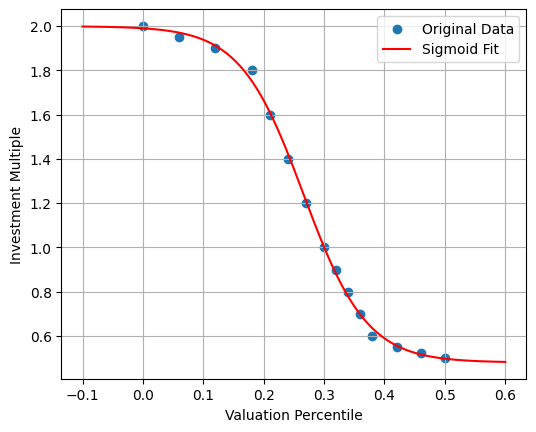

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 支付宝数据（平均成本法）
# x = np.array([0.75, 0.8, 0.85, 0.9, 0.925, 0.95, 0.975, 1.0, 1.025, 1.05, 1.075, 1.1, 1.15, 1.2, 1.25])
# y = np.array([2, 1.95, 1.9, 1.8, 1.6, 1.4, 1.2, 1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.525, 0.5])
# 采用数据（估值分位法）
x = np.array([0, 0.06, 0.12, 0.18, 0.21, 0.24, 0.27, 0.3, 0.32, 0.34, 0.36, 0.38, 0.42, 0.46, 0.5])
y = np.array([2, 1.95, 1.9, 1.8, 1.6, 1.4, 1.2, 1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.525, 0.5])

# Define the sigmoid function (4-parameter logistic function)
def sigmoid(x, a, b, c, d):
    return d + (a - d) / (1 + np.exp(b * (x - c)))

# Provide improved initial guesses for the parameters [a, b, c, d]
initial_guesses = [2.0, 10.0, 0.3, 0.5] # Changed c to be within the data range

# Use curve_fit to find the best parameters
popt, pcov = curve_fit(sigmoid, x, y, p0=initial_guesses, maxfev=5000)

# Generate a range of x values for plotting the fitted curve
x_fit = np.linspace(x.min() - 0.1, x.max() + 0.1, 200)
y_fit = sigmoid(x_fit, *popt)

# Plot the original data and the fitted curve
plt.figure(figsize=(6, 4.8))
plt.scatter(x, y, label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Sigmoid Fit')
plt.xlabel('Valuation Percentile')
plt.ylabel('Investment Multiple')
plt.legend()
plt.grid(True)

# Print the optimized parameters
print("Optimized Parameters [a, b, c, d]:", popt)
# Corrected the print statement to simply display "exp" as text
print(f"Fitted Equation: y = {popt[3]:.4f} + ({popt[0]:.4f} - {popt[3]:.4f}) / (1 + exp({popt[1]:.4f} * (x - {popt[2]:.4f})))")

### 成长性市场与震荡性市场，纳斯达克和上证

这篇博客写于2025.09.03，过去20年，纳斯达克从05年9月初的2140点上涨到今天的21280点，增长了近10倍；而上证指数05年9月初是1160点，今天才3813点，增长了3.3倍。
可以明显感觉到，纳斯达克是长期上涨的，属于成长性市场，而A股则是终年波动的，属于震荡性市场。
应对这两种市场，本方案认为需要采用不同的投资策略。

对于成长性市场，最好的做法是“买入并持有”，所以每次定投，都按照固定比例买入。
尽管纳斯达克也经历过诸如08年金融危机、22年加息等事件造成的大幅波动，但整体趋势依然向上。
所以需要对纳斯达克的持仓进行定期的再平衡，上涨时固定收益，下跌时买入便宜资产。

对于震荡性市场，最好的做法是“高抛低吸”，网格交易这种短线做法不符合本方案的长期投资理念。
高低的定义主要参考市盈率（Price-to-Earnings Ratio，PE）和（Price-to-Book Ratio，PB）的相对水平。
理想的做法是低估时买入，高估时卖出。

### 选基策略

1. 大前提是选指数ETF，ETF应关注：低费率、高流动性（成交金额）、高持股比例。
2. A股宽基指数：A50，科创50，创业板50，北证50。
3. A股行业指数：消费（中证消费），医疗（中证医疗），芯片（中证半导体），新能源，银行。

### 投资箴言

本节记录长期投资中一些重要的理念，应时常回顾，保持初心，不要被市场情绪所影响。

- 股票市场短期不可预测。（所有技术指标都只能作为趋势参考，而不能作为买卖依据）
- 《共同基金常识》
  - 在很长的周期里，投机因素对回报率的影响已被证明是中性的。投机不可能永远自我获益。
  - **遵循一个平衡的投资项目；寻求最低的成本；依赖高度分散化的债券和股票型指数基金；要求税收有效；交易不过于频繁；对过去的市场回报率和热门基金经理的业绩表现重复表示怀疑；眼光放长远些。然后，坚持到底。**
- 《投资最简单的事》
  - 对于大多数人而言，只有价值投资才是真正可学、可用、可掌握的。
  - 知道自己的能力边界，发挥自己的优势，买便宜的好公司，注意安全边际，注重定价权，人弃我取，在胜负已分的行业里找赢家。

## 投资实操

1. 查询当前股债性价比，采用的是近10年的FED股债利差，主要参考雪球（或天天基金）的数据。
2. 查询持仓及拟投资品种的估值水平，短期来看，由于A股波动较大，采用的是近三年的PB分位数，参考韭圈儿的数据。
3. 交易日确定：
   1. 每月执行一次交易，分为两个交易日，第一天为减仓日，第二日为定投日。
   2. 减仓日根据估值选择是否减仓，如果减仓，则在定投日将减仓资金与当期资金一起用于定投。
   3. 定投日通常选在发薪日或者发薪日后一个交易日，如果发薪日不固定或月内有零散收入进账，则选在每月的第二个交易日。
   4. 定投日的资金不得高于持仓的一定比例（三年估值25%，五年估值15%，即与减仓比例保持一致），多余资金转入下一期。
4. 操作确定：
   1. 当PB分位数低于50%，执行定投。（以计算出来的配比为参考，用资金去平衡配比，减少年度再平衡的大波动）
   2. 当PB分位数介于50%-90%之间时，耐心持有。
   3. 当PB分位数高于90%，执行减仓，减仓分四次，每次减仓25%（4个月/3年=1/9，差不多就是高估的比例，如果看五年估值则6个月），减仓计划启动后，若PB分位数回落至90%以下，则暂停后续减仓。
5. 年末（12月）对资产进行一次再平衡。目标主要是美股和黄金，设目标配比为x，当前配比为y，分三种情况：
   1. y > 1.25x，减仓日卖出多余份额，定投日将减仓资金与当期资金一起用于定投。
   2. x < y < 1.25x，不操作。
   3. y < x，若当期定投资金不足以填补缺口，则优先根据股债性价比配比卖出A股。

In [ ]:
# 导入必要的库，并为 pandas 和 numpy 设置类型提示
from typing import Dict, Any, Optional
import numpy as np
import pandas as pd
import akshare as ak

# --- 核心计算与数据获取函数 ---

def get_weight(percentile: float) -> float:
    """根据百分位计算权重 (Sigmoid 函数)"""
    return 0.4802 + (1.9986 - 0.4802) / (1 + np.exp(19.1060 * (percentile - 0.2660)))

def fetch_market_data() -> Optional[pd.DataFrame]:
    """
    从东方财富获取并整合最新的ETF和LOF基金价格数据。
    
    Returns:
        Optional[pd.DataFrame]: 包含基金代码和最新价的DataFrame，如果获取失败则返回None。
    """
    print("--- 正在从东方财富(em)获取ETF和LOF实时数据 ---")
    try:
        # 获取ETF和LOF数据
        etf_price_df = ak.fund_etf_spot_em()[['代码', '最新价']]
        lof_price_df = ak.fund_lof_spot_em()[['代码', '最新价']]

        # 重命名并合并
        etf_price_df.rename(columns={'代码': 'fund_code', '最新价': 'price'}, inplace=True)
        lof_price_df.rename(columns={'代码': 'fund_code', '最新价': 'price'}, inplace=True)
        
        all_prices_df = pd.concat([etf_price_df, lof_price_df])
        
        # 数据清洗
        all_prices_df['price'] = pd.to_numeric(all_prices_df['price'], errors='coerce')
        all_prices_df.dropna(subset=['price'], inplace=True)
        all_prices_df.drop_duplicates(subset=['fund_code'], keep='first', inplace=True)
        all_prices_df.set_index('fund_code', inplace=True)
        
        print("数据获取成功！")
        return all_prices_df
        
    except Exception as e:
        print(f"获取ETF或LOF数据失败，请检查网络连接或akshare接口: {e}")
        return None

def process_portfolio(
    portfolio_details: pd.DataFrame, 
    allocated_amount: float, 
    all_prices_df: pd.DataFrame
) -> pd.DataFrame:
    """
    为给定的投资组合详情计算价格和股数。

    Args:
        portfolio_details (pd.DataFrame): 包含投资金额和基金代码的DataFrame。
        allocated_amount (float): 分配给该组合的总金额。
        all_prices_df (pd.DataFrame): 包含所有基金价格的DataFrame。

    Returns:
        pd.DataFrame: 包含价格和计算后股数的DataFrame。
    """
    if allocated_amount <= 0 or portfolio_details.empty:
        return pd.DataFrame()

    # 关联价格
    df = portfolio_details.join(all_prices_df, on='fund_code')

    # 检查是否有代码未找到价格
    missing_prices = df[df['price'].isna()]
    if not missing_prices.empty:
        print(f"\n[警告] 以下基金代码未能获取到价格，将不会被计算: {missing_prices['fund_code'].tolist()}")
        df.dropna(subset=['price'], inplace=True)

    # 计算股数 (使用向量化操作以提升性能)
    # 使用 np.floor确保股数为整数，并处理价格为0的异常情况
    df['shares'] = np.floor(df['amount'] / df['price'].replace(0, np.nan)).fillna(0).astype(int)
    
    return df[['name', 'fund_code', 'amount', 'price', 'shares']]


def display_results(title: str, df: pd.DataFrame, total_investment: float):
    """
    格式化并打印投资组合的详情，包括占总投资的比例。

    Args:
        title (str): 显示的标题。
        df (pd.DataFrame): 要显示的DataFrame。
        total_investment (float): 总投资金额，用于计算占比
    """
    print(f"\n------ {title} ------")
    if df.empty:
        print("没有配置或计算的资产。")
    else:
        # 创建副本以避免SettingWithCopyWarning
        display_df = df.copy()
        # 计算占总投资的比例
        display_df['ratio'] = (display_df['amount'] / total_investment * 100).map('{:.2f}%'.format)
        display_df['amount'] = display_df['amount'].map('{:.2f}'.format)
        display_df['price'] = display_df['price'].map('{:.3f}'.format)
        print(display_df.to_string(index=False))


# --- 主业务逻辑函数 ---

def generate_investment_plan(
    total_investment: float, 
    fixed_ratio_assets: Dict[str, Any], 
    bond_ratio: float, 
    stock_portfolio: Dict[str, Any], 
    bond_portfolio: Dict[str, Any]
):
    """
    根据输入的投资组合和比例，计算并打印完整的投资分配方案。
    """
    # 1. 获取市场数据
    all_prices_df = fetch_market_data()
    if all_prices_df is None:
        return # 数据获取失败，提前退出

    # 2. 计算固定比例资产
    fixed_details_list = [
        {'name': name, 'fund_code': v['code'], 'amount': total_investment * v['fix_ratio']} 
        for name, v in fixed_ratio_assets.items()
    ]
    fixed_details_df = pd.DataFrame(fixed_details_list)
    fixed_investment_df = process_portfolio(fixed_details_df, fixed_details_df['amount'].sum(), all_prices_df)
    
    fixed_investment_total = fixed_details_df['amount'].sum() if not fixed_details_df.empty else 0

    # 3. 计算国内股债分配额
    cn_investment = total_investment - fixed_investment_total
    bond_investment_total = cn_investment * bond_ratio
    stock_investment_total = cn_investment * (1 - bond_ratio)

    # 4. 分配债券投资 (均等分配)
    bond_details_df = pd.DataFrame()
    if bond_portfolio and bond_investment_total > 0:
        num_bonds = len(bond_portfolio)
        amount_per_bond = bond_investment_total / num_bonds
        bond_details_list = [
            {'name': name, 'fund_code': v['code'], 'amount': amount_per_bond}
            for name, v in bond_portfolio.items()
        ]
        bond_details_df = pd.DataFrame(bond_details_list)
    bond_investment_df = process_portfolio(bond_details_df, bond_investment_total, all_prices_df)

    # 5. 分配A股投资 (按权重分配)
    stock_details_df = pd.DataFrame()
    if stock_portfolio and stock_investment_total > 0:
        stock_details_list = [
            {'name': name, 'fund_code': v['code'], 'idx_pctl': float(v['idx_pctl'])}
            for name, v in stock_portfolio.items()
        ]
        stock_details_df = pd.DataFrame(stock_details_list)
        stock_details_df['weight'] = stock_details_df['idx_pctl'].apply(get_weight)
        total_weight = stock_details_df['weight'].sum()
        
        if total_weight > 0:
            stock_details_df['amount'] = (stock_details_df['weight'] / total_weight) * stock_investment_total
        else:
            stock_details_df['amount'] = 0 # 避免除以零
            
    stock_investment_df = process_portfolio(stock_details_df, stock_investment_total, all_prices_df)
    
    # --- 结果汇总与展示 ---
    display_results("固定比例资产详情", fixed_investment_df, total_investment)
    display_results("债券投资组合详情", bond_investment_df, total_investment)
    display_results("A股投资组合详情", stock_investment_df, total_investment)

    # 7. 校验总金额
    total_calculated_amount = (fixed_details_df['amount'].sum() + 
                               bond_details_df['amount'].sum() + 
                               stock_details_df['amount'].sum())
    print(f"\n校验计划总金额: {total_calculated_amount:.2f}")
    
# --- 程序入口 ---

if __name__ == "__main__":
    # --- 投资组合配置 ---
    STOCK_PORTFOLIO = {
        "consume": {"code": "159928", "idx_pctl": "0.1678"},  # 中证消费
        # "medical": {"code": "512170", "idx_pctl": "0.27"},    # 中证医疗
        # "non-exist": {"code": "999999", "idx_pctl": "0.1"} # 用于测试价格缺失警告
    }

    BOND_PORTFOLIO = {
        "index_bond": {"code": "161119"}, # 易方达新综债
    }

    FIXED_RATIO_ASSETS = {
        "gold": {"code": "518880", "fix_ratio": 0.05},
        "NASDAQ": {"code": "513100", "fix_ratio": 0.3},
    }
    
    # --- 投资参数 ---
    TOTAL_INVESTMENT = 2000.0
    BOND_RATIO = 0.66

    # --- 执行计划生成 ---
    generate_investment_plan(
        total_investment=TOTAL_INVESTMENT, 
        fixed_ratio_assets=FIXED_RATIO_ASSETS, 
        bond_ratio=BOND_RATIO, 
        stock_portfolio=STOCK_PORTFOLIO, 
        bond_portfolio=BOND_PORTFOLIO
    )

--- 正在从东方财富(em)获取ETF和LOF实时数据 ---


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

数据获取成功！

------ 固定比例资产详情 ------
  name fund_code amount price  shares  ratio
  gold    518880 100.00 8.343      11  5.00%
NASDAQ    513100 600.00 1.804     332 30.00%

------ 债券投资组合详情 ------
      name fund_code amount price  shares  ratio
index_bond    161119 864.63 1.740     496 43.23%

------ A股投资组合详情 ------
   name fund_code amount price  shares  ratio
consume    159928 435.37 0.842     517 21.77%

校验计划总金额: 2000.00
